In [13]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
# start = datetime.datetime.now() - datetime.timedelta(7)
# end = datetime.datetime.now()

# start = '2020-01-01'
# end = datetime.datetime.now()

df = yf.download('SPY, NVDA, AMD')
df

[*********************100%***********************]  3 of 3 completed


Price            Close                                High              \
Ticker             AMD        NVDA         SPY         AMD        NVDA   
Date                                                                     
1980-03-17    3.145833         NaN         NaN    3.302083         NaN   
1980-03-18    3.031250         NaN         NaN    3.125000         NaN   
1980-03-19    3.041667         NaN         NaN    3.083333         NaN   
1980-03-20    3.010417         NaN         NaN    3.062500         NaN   
1980-03-21    2.916667         NaN         NaN    3.020833         NaN   
...                ...         ...         ...         ...         ...   
2024-12-16  126.690002  132.000000  604.754578  127.760002  134.399994   
2024-12-17  125.019997  130.389999  602.262939  127.080002  131.589996   
2024-12-18  121.410004  128.910004  584.313416  127.750000  136.699997   
2024-12-19  118.879997  130.679993  584.133972  123.379997  134.029999   
2024-12-20  119.209999  134.699997  591.150024  121.860001  135.279999   

Price                          Low                                Open  \
Ticker             SPY         AMD        NVDA         SPY         AMD   
Date                                                                     
1980-03-17         NaN    3.125000         NaN         NaN    0.000000   
1980-03-18         NaN    2.937500         NaN         NaN    0.000000   
1980-03-19         NaN    3.020833         NaN         NaN    0.000000   
1980-03-20         NaN    3.010417         NaN         NaN    0.000000   
1980-03-21         NaN    2.906250         NaN         NaN    0.000000   
...                ...         ...         ...         ...         ...   
2024-12-16  605.741308  123.120003  130.419998  603.179921  126.010002   
2024-12-17  603.139992  123.150002  126.860001  600.867672  124.449997   
2024-12-18  604.375836  120.430000  128.279999  583.924709  125.430000   
2024-12-19  591.010851  118.449997  129.550003  583.884811  122.160004   
2024-12-20  595.750000  117.900002  128.220001  580.909973  118.000000   

Price                                 Volume                            
Ticker            NVDA         SPY       AMD         NVDA          SPY  
Date                                                                    
1980-03-17         NaN         NaN    219600          NaN          NaN  
1980-03-18         NaN         NaN    727200          NaN          NaN  
1980-03-19         NaN         NaN    295200          NaN          NaN  
1980-03-20         NaN         NaN    159600          NaN          NaN  
1980-03-21         NaN         NaN    130800          NaN          NaN  
...                ...         ...       ...          ...          ...  
2024-12-16  134.179993  603.967249  42090300  237951100.0   43695200.0  
2024-12-17  129.089996  602.163299  43314900  259410300.0   55773500.0  
2024-12-18  133.860001  601.953994  49724400  277444500.0  108248700.0  
2024-12-19  131.759995  589.376338  46160700  209719200.0   85919500.0  
2024-12-20  129.809998  581.770020  53366800  305207400.0  125535900.0  

[11287 rows x 15 columns]

<Axes: xlabel='Date'>

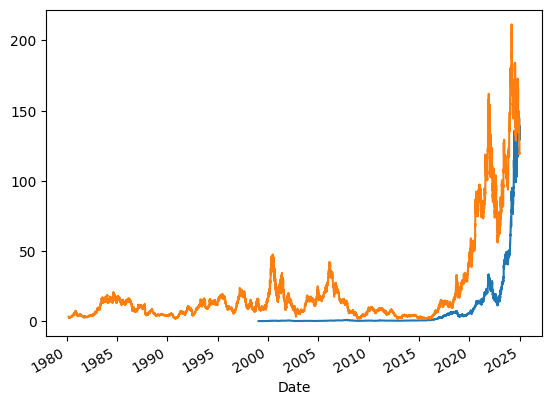

In [15]:
df['Close']['NVDA'].plot()
df['Close']['AMD'].plot()


<Axes: xlabel='Date'>

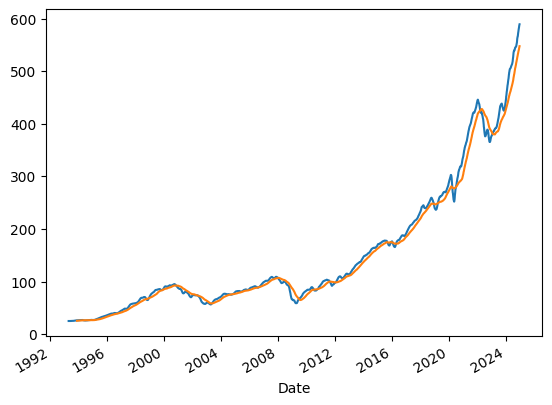

In [16]:
spy = df['Close']['SPY']
# spy.plot()

ma1 = spy.rolling(50).mean()
ma2 = spy.rolling(200).mean()
ma1.plot()
ma2.plot()

In [17]:
entry = None
pnl = None
pnls = []
dates = []

for i in range(len(spy)):
    if (ma1.iloc[i] - ma2.iloc[i]) > 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) < 0:
        if entry:
            # calculate pnl for previous short
            pnl = entry - spy.iloc[i]
            pnls.append(pnl)
            dates.append(spy.index[i])
        entry = spy.iloc[i] 
        print("entery long", pnl)

    elif (ma1.iloc[i] - ma2.iloc[i]) < 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) > 0:
        if entry:
            # calculate pnl for previous long
            pnl = spy.iloc[i] - entry
            pnls.append(pnl)
            dates.append(spy.index[i])

        entry = spy.iloc[i] 
        
        print("enter short", pnl)

enter short None
entery long -1.565582275390625
enter short 34.58220672607422
entery long -12.294353485107422
enter short 17.23088836669922
entery long 17.78559112548828
enter short -1.2952041625976562
entery long 9.422111511230469
enter short 12.231025695800781
entery long -1.5260009765625
enter short 12.327018737792969
entery long -2.760833740234375
enter short 14.746337890625
entery long 37.805809020996094
enter short 12.354240417480469
entery long -9.527923583984375
enter short 2.6955032348632812
entery long -10.514816284179688
enter short 61.82758331298828
entery long -9.207321166992188
enter short -13.9901123046875
entery long -20.042770385742188
enter short 59.05021667480469
entery long -16.777862548828125
enter short -16.544754028320312
entery long -56.60289001464844
enter short 119.92593383789062
entery long 23.259246826171875


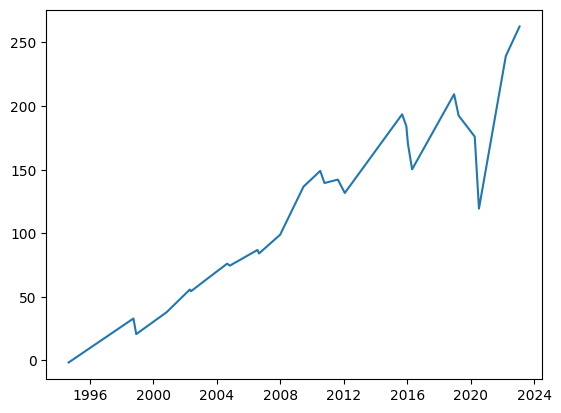

In [18]:
plt.plot(dates, np.cumsum(pnls))

# Percentage PNL

Percentage is important because just using cash pnl does not account for the current price of stock

In [19]:
entry = None
pnl = None
pnls = []
dates = []

for i in range(len(spy)):
    if (ma1.iloc[i] - ma2.iloc[i]) > 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) < 0:
        if entry:
            # calculate pnl for previous short
            pnl = (entry - spy.iloc[i])/entry  # normalize with entry to get the percentage change
            pnls.append(pnl)
            dates.append(spy.index[i])
        entry = spy.iloc[i] 
        print("entery long", pnl)

    elif (ma1.iloc[i] - ma2.iloc[i]) < 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) > 0:
        if entry:
            # calculate pnl for previous long
            pnl = (spy.iloc[i] - entry) / entry # normalize with entry to get percentage change
            pnls.append(pnl)
            dates.append(spy.index[i])

        entry = spy.iloc[i] 
        
        print("enter short", pnl)

enter short None
entery long -0.060324673883438366
enter short 1.2567037815542508
entery long -0.1979754589355956
enter short 0.23161432163123055
entery long 0.19411152203391382
enter short -0.017540674754674395
entery long 0.129879834007057
enter short 0.1937658017250486
entery long -0.020251161134002656
enter short 0.16034154948062293
entery long -0.03094870134812799
enter short 0.16034274020608943
entery long 0.35427243889238813
enter short 0.17928566074548655
entery long -0.11724889407055829
enter short 0.02968933113480211
entery long -0.11247500789782665
enter short 0.5944924608458498
entery long -0.05552325295183892
enter short -0.07992727480680191
entery long -0.1244541546778404
enter short 0.32608542698959664
entery long -0.0698674711886291
enter short -0.06439745792428034
entery long -0.2354808646766483
enter short 0.4038258366827636
entery long 0.05579090534434181


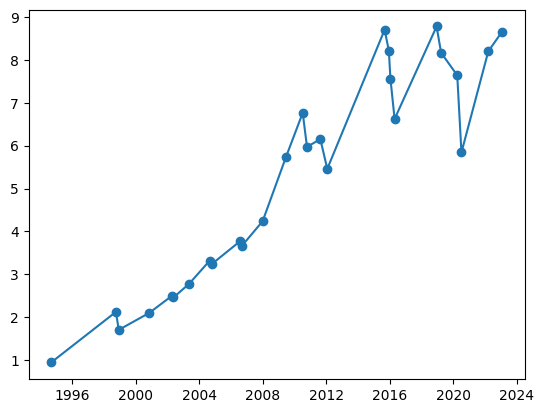

In [20]:
# to plot in case of percentage we need to cummulatively multiply instead of cummulative sum
# but we cannot just do cum product because percentages are small and  we get really small values so we add 1 to show percentage increase in value from entry reference of 1
plt.plot(dates, np.cumprod([1+x for x in pnls]), '-o')

## Unrealized Pnls
- Looking at the pnl curve is not enough, because it does not tell us about the risks involved with the strategy.
- So we need to look in detail and analyze whats happening to equity during trade
- A good measure is sharpe ratio.
- sharpe ratio is ratio of pnl with risk of strategy
- The above graph is realized pnl
- need to also pay attention to unrealized pnl


In [21]:
entry = None
pnl = None
pnls = []
dates = []
unrlzd = []
unrlzd_dates = []
inpos = 0
for i in range(len(spy)):
    unr = ((spy.iloc[i] - spy.iloc[i-1])/spy.iloc[i-1]) * inpos  # calculate unrealized position
    unrlzd.append(unr)
    unrlzd_dates.append(spy.index[i])
    if (ma1.iloc[i] - ma2.iloc[i]) > 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) < 0:
        if entry:
            # calculate pnl for previous short
            pnl = (entry - spy.iloc[i])/entry  # normalize with entry to get the percentage change
            pnls.append(pnl)
            dates.append(spy.index[i])
        entry = spy.iloc[i] 
        inpos = 1
        print("entery long", pnl)

    elif (ma1.iloc[i] - ma2.iloc[i]) < 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) > 0:
        if entry:
            # calculate pnl for previous long
            pnl = (spy.iloc[i] - entry) / entry # normalize with entry to get percentage change
            pnls.append(pnl)
            dates.append(spy.index[i])

        entry = spy.iloc[i] 
        inpos = -1
        print("enter short", pnl)

enter short None
entery long -0.060324673883438366
enter short 1.2567037815542508
entery long -0.1979754589355956
enter short 0.23161432163123055
entery long 0.19411152203391382
enter short -0.017540674754674395
entery long 0.129879834007057
enter short 0.1937658017250486
entery long -0.020251161134002656
enter short 0.16034154948062293
entery long -0.03094870134812799
enter short 0.16034274020608943
entery long 0.35427243889238813
enter short 0.17928566074548655
entery long -0.11724889407055829
enter short 0.02968933113480211
entery long -0.11247500789782665
enter short 0.5944924608458498
entery long -0.05552325295183892
enter short -0.07992727480680191
entery long -0.1244541546778404
enter short 0.32608542698959664
entery long -0.0698674711886291
enter short -0.06439745792428034
entery long -0.2354808646766483
enter short 0.4038258366827636
entery long 0.05579090534434181


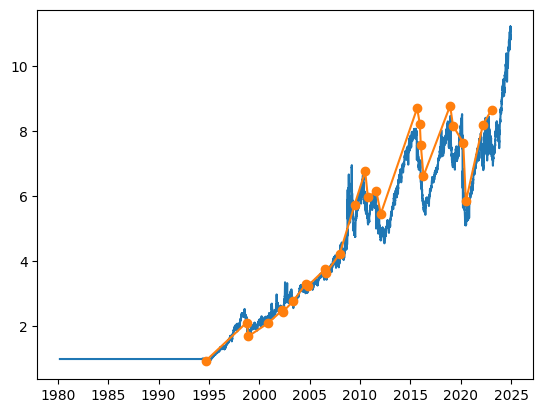

In [22]:
# unrealized pnl
plt.plot(unrlzd_dates, np.nancumprod([1+ x for x in unrlzd]))
plt.plot(dates, np.cumprod([1+x for x in pnls]), '-o')

# Evaluating a Strategy

### sharpe ratio
- calculated on daily changes in the unrealized pnls
- mean of per candle returns, 

In [44]:
# risk adjusted returns
time_interval = 252 # annual number of days to trade
rar = np.nanmean(unrlzd)/np.nanstd(unrlzd) * np.sqrt(time_interval)
rar

np.float64(0.1520142413009829)

### profit per trade
- every trade has commissions, but it might look good on paper but if our wins are not overcoming those commissions

In [45]:
commissions = 0.002 # commissions in dollar of buying and seeling
np.mean(pnls) - commissions  # per trade profit

np.float64(0.00836373382987406)

### average hold time

shorter hold times more commissions as more number of trades


In [42]:
ma1 = spy.rolling(20).mean()
ma2 = spy.rolling(100).mean()

entry = None
pnl = None
pnls = []
dates = []
unrlzd = []
unrlzd_dates = []

hold_times = []

inpos = 0
for i in range(len(spy)):
    unr = ((spy.iloc[i] - spy.iloc[i-1])/spy.iloc[i-1]) * inpos  # calculate unrealized position
    unrlzd.append(unr)
    unrlzd_dates.append(spy.index[i])
    if (ma1.iloc[i] - ma2.iloc[i]) > 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) < 0:
        if entry:
            # calculate pnl for previous short
            pnl = (entry - spy.iloc[i])/entry  # normalize with entry to get the percentage change
            pnls.append(pnl)
            dates.append(spy.index[i])
            hold_times.append((spy.index[i] - start).total_seconds())
        entry = spy.iloc[i] 
        inpos = 1
        start = spy.index[i]
        print("entery long", pnl)

    elif (ma1.iloc[i] - ma2.iloc[i]) < 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) > 0:
        if entry:
            # calculate pnl for previous long
            pnl = (spy.iloc[i] - entry) / entry # normalize with entry to get percentage change
            pnls.append(pnl)
            dates.append(spy.index[i])
            hold_times.append((spy.index[i] - start).total_seconds())
        entry = spy.iloc[i] 
        inpos = -1
        start = spy.index[i]
        print("enter short", pnl)

enter short None
entery long -0.029798764397200837
enter short -0.03606440405538099
entery long -0.03724549505244077
enter short -0.015389197882315036
entery long -0.04356075914946158
enter short 0.38560694969140225
entery long -0.06231303867397775
enter short 0.15146408981623555
entery long -0.10247962392004399
enter short 0.10954209552519885
entery long -0.04050352322987612
enter short 0.1220778538262262
entery long -0.07149779250208352
enter short 0.19074200671455369
entery long -0.007476304043502292
enter short -0.0279977466487294
entery long -0.07249542862676518
enter short -0.01644227432329134
entery long -0.1135552722118666
enter short -0.07451364086397588
entery long -0.028312463104000974
enter short -0.034631504502457215
entery long -0.04745946981387083
enter short -0.025267065951586433
entery long 0.08429213725058389
enter short -0.07476112974178874
entery long 0.03675011881688402
enter short -0.031327786627213736
entery long -0.056632828016094795
enter short -0.0331690839552

In [43]:
np.mean([x/86400 for x in hold_times]) # hold time in days average

np.float64(121.74157303370787)